In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
import warnings
warnings.simplefilter("ignore")

In [61]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.shape

(768, 9)

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [67]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**All these Features will have atleast a little value and cannot be 0**

In [69]:
print('Blood Pressure : ',df[df['BloodPressure']==0].shape[0])
print('Glucose : ',df[df['Glucose']==0].shape[0])
print('Skin Thickness : ',df[df['SkinThickness']==0].shape[0])
print('Insulin : ',df[df['Insulin']==0].shape[0])
print('BMI : ',df[df['BMI']==0].shape[0])

Blood Pressure :  35
Glucose :  5
Skin Thickness :  227
Insulin :  374
BMI :  11


In [70]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.50)
Q3 = df.quantile(0.75)
print("\nQ1 (25th percentile):\n", Q1)
print("\nQ2 (50th percentile or median):\n", Q2)
print("\nQ3 (75th percentile):\n", Q3)


Q1 (25th percentile):
 Pregnancies                  1.00000
Glucose                     99.75000
BloodPressure               64.00000
SkinThickness               23.00000
Insulin                     30.50000
BMI                         27.50000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

Q2 (50th percentile or median):
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      31.2500
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Name: 0.5, dtype: float64

Q3 (75th percentile):
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI      

In [73]:
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers

0      False
1      False
2      False
3      False
4       True
       ...  
763     True
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [74]:
df_cleaned = df[~outliers]
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
5,5,116.0,74.0,23,30.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,23,30.5,22.5,0.142,33,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


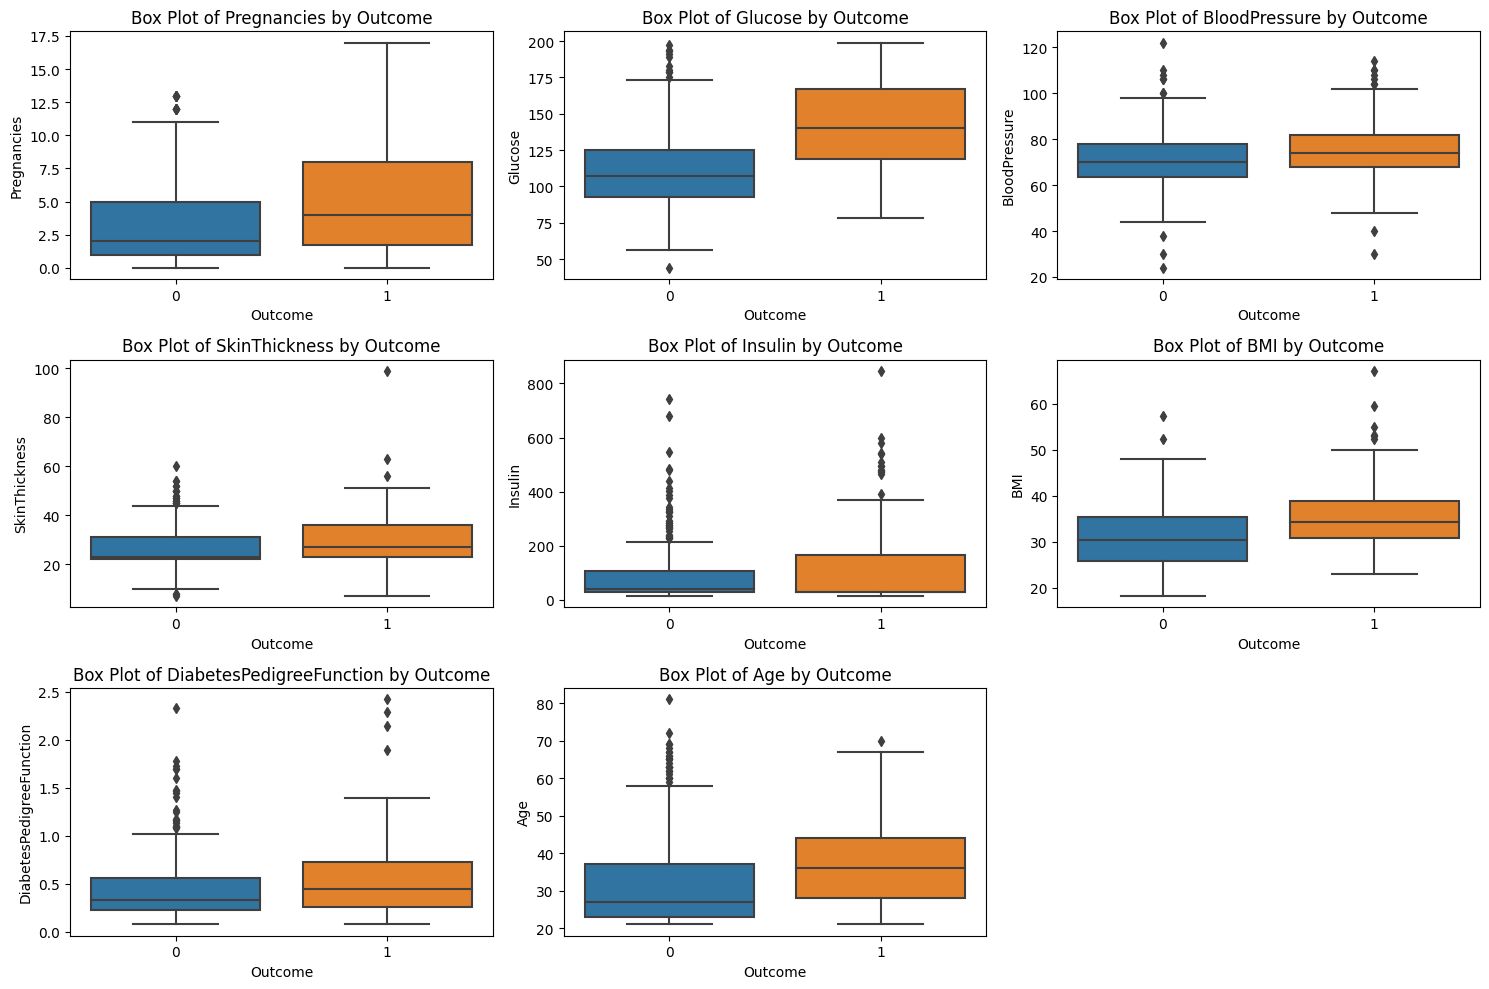

AFTER removing outliers


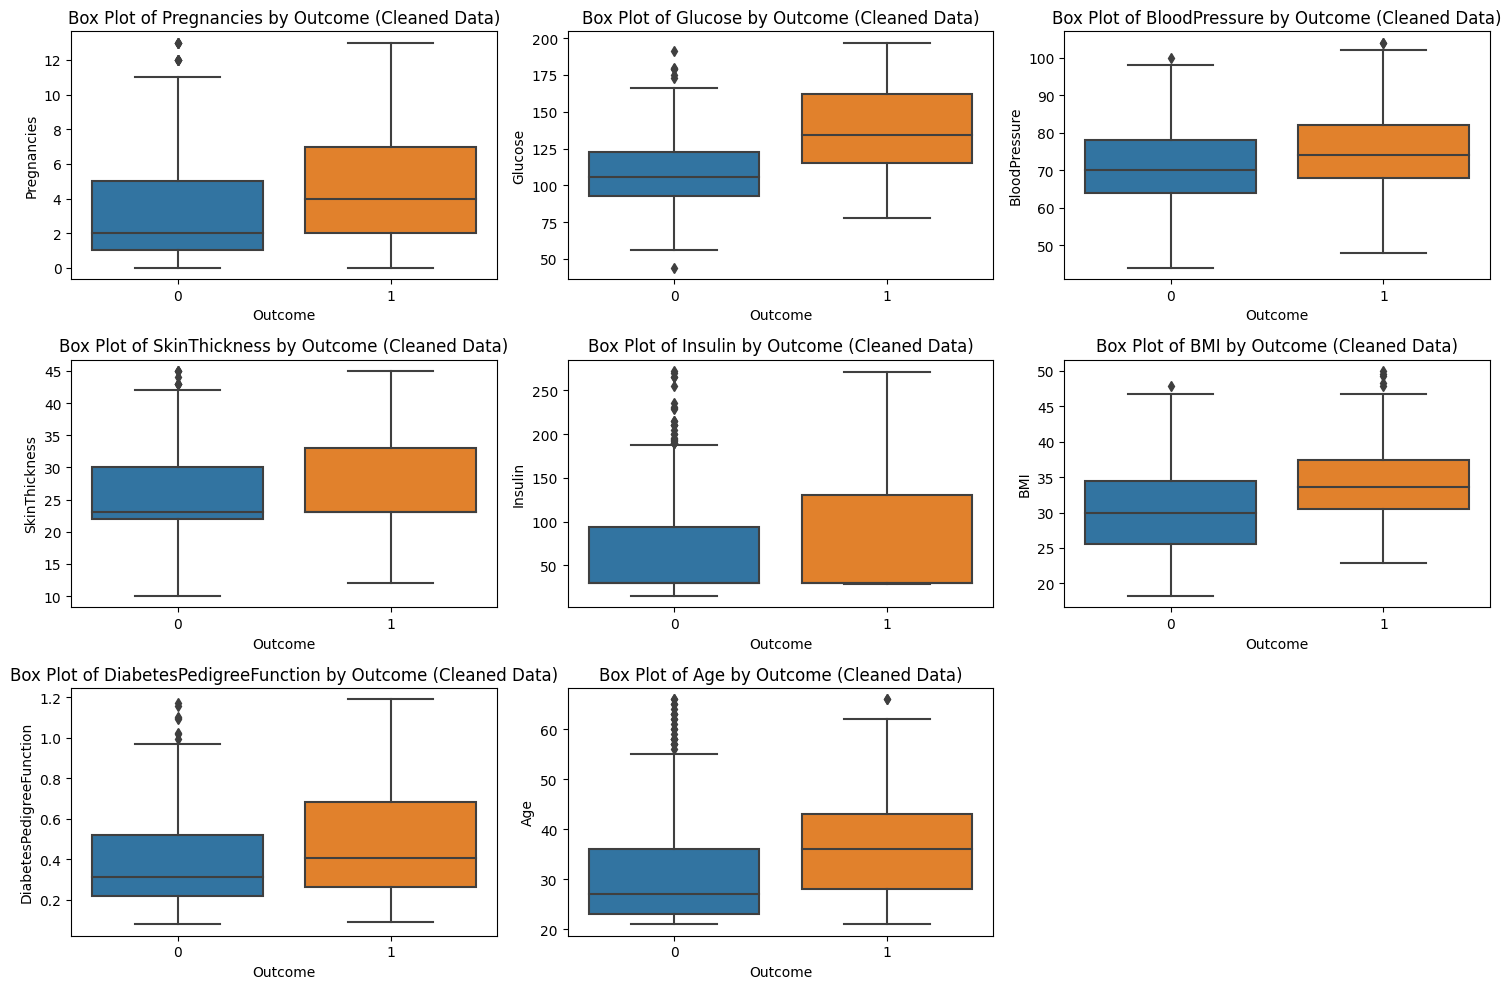

In [75]:
import seaborn as sns 
import matplotlib.pyplot as plt 

features = df.columns.drop('Outcome')
target = 'Outcome'

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Box Plot of {feature} by {target}')
plt.tight_layout()
plt.show()

print('AFTER removing outliers')

# Visualize the cleaned data using box plot grouped by Outcome
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=df_cleaned)
    plt.title(f'Box Plot of {feature} by {target} (Cleaned Data)')
plt.tight_layout()
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

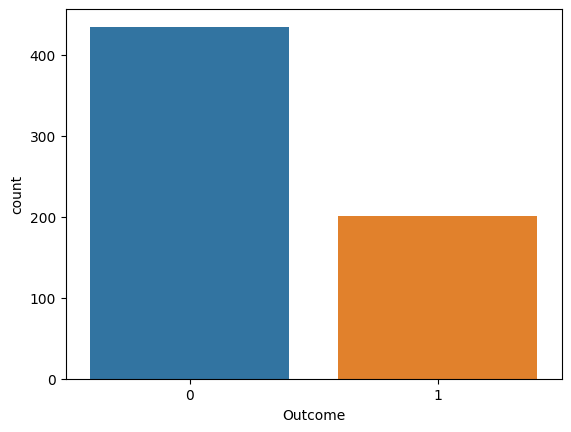

In [76]:
sns.countplot(x='Outcome',data=df_cleaned)

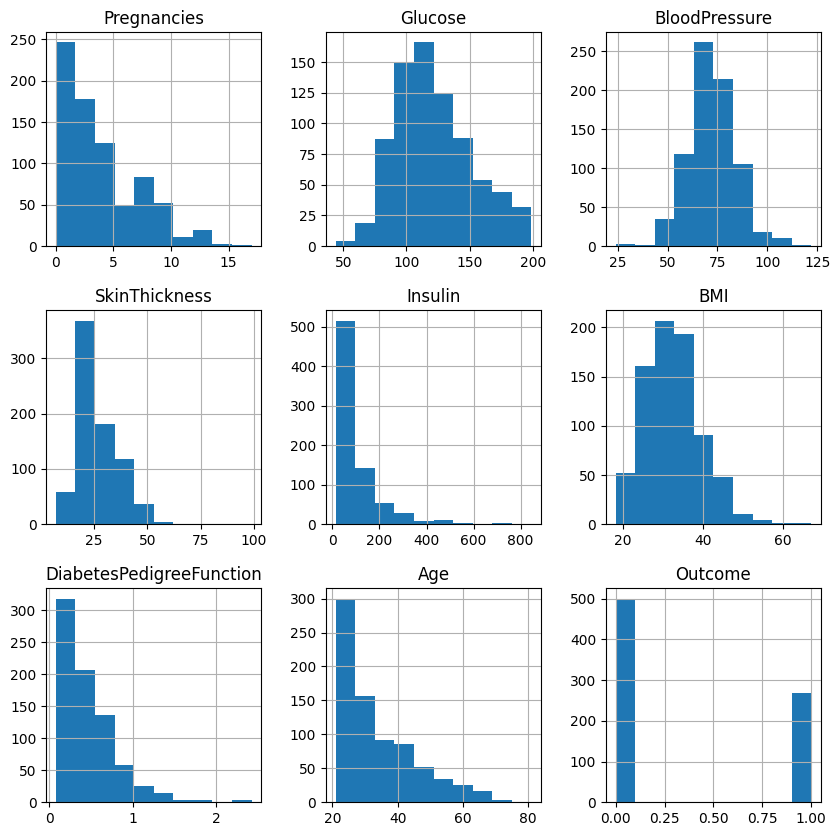

In [77]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

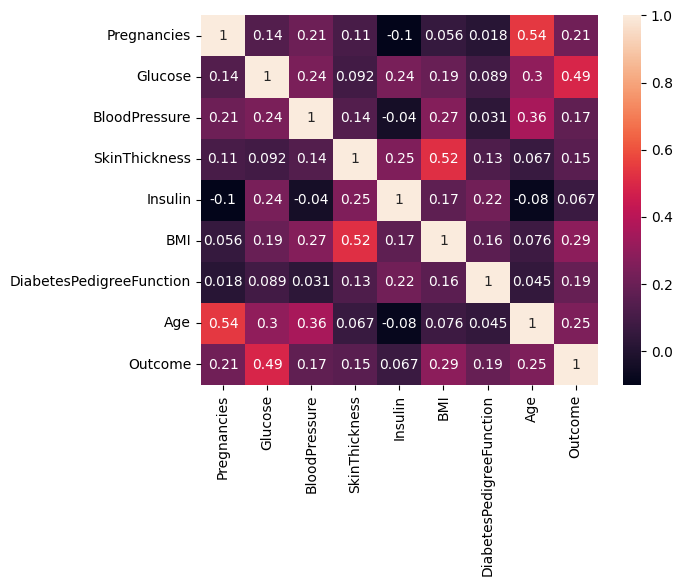

In [78]:
corr=df_cleaned.corr()
sns.heatmap(corr, annot=True)

In [79]:
target = 'Outcome'
corr_matrix = df_cleaned.corr()
correlation_with_target = corr_matrix[target].drop(target)
print("\nCorrelation with target variable:\n", correlation_with_target)


Correlation with target variable:
 Pregnancies                 0.214323
Glucose                     0.490453
BloodPressure               0.173124
SkinThickness               0.153809
Insulin                     0.067438
BMI                         0.287197
DiabetesPedigreeFunction    0.190737
Age                         0.249491
Name: Outcome, dtype: float64


In [80]:
threshold_target = 0.1
selected_features = correlation_with_target[abs(correlation_with_target) > threshold_target].index.tolist()

# Display selected features
print(f"\nSelected features based on correlation with the target variable (threshold = {threshold_target}):\n", selected_features)



Selected features based on correlation with the target variable (threshold = 0.1):
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [81]:
# From the selected features, find pairs of features that are highly correlated with each other
threshold_feature = 0.6
corr_matrix_selected = df[selected_features].corr()
highly_correlated_pairs = [
    (feature1, feature2) for feature1 in selected_features for feature2 in selected_features
    if feature1 != feature2 and abs(corr_matrix_selected.loc[feature1, feature2]) > threshold_feature
]

# Display highly correlated feature pairs
print(f"\nHighly correlated feature pairs (correlation > {threshold_feature}):\n", highly_correlated_pairs)


Highly correlated feature pairs (correlation > 0.6):
 []


In [82]:
# Remove one of each pair of highly correlated features
for feature1, feature2 in highly_correlated_pairs:
    if feature1 in selected_features and feature2 in selected_features:
        # Prefer to remove the feature with lower correlation with the target
        if abs(correlation_with_target[feature1]) < abs(correlation_with_target[feature2]):
            selected_features.remove(feature1)
        else:
            selected_features.remove(feature2)

# Display final selected features
print(f"\nFinal selected features after removing highly correlated ones:\n", selected_features)

# Create a new DataFrame with selected features
df_selected = df[selected_features + [target]]


Final selected features after removing highly correlated ones:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [83]:
X=df_selected.drop('Outcome',axis=1)
y=df_selected['Outcome']

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
XSCDF= pd.DataFrame(X_scaled,columns=X.columns)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(XSCDF, y, test_size=0.2, random_state=42)

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Training Accuracy of KNN : ', knn.score(X_train,y_train))
print('Testing Accuracy of KNN : ', knn.score(X_test,y_test))

Training Accuracy of KNN :  0.8257328990228013
Testing Accuracy of KNN :  0.7012987012987013


In [87]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)

print('Training Accuracy of Logistic Regression : ', lgr.score(X_train,y_train))
print('Testing Accuracy of Logistic Regression : ', lgr.score(X_test,y_test))

Training Accuracy of Logistic Regression :  0.7719869706840391
Testing Accuracy of Logistic Regression :  0.7532467532467533


In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

print('Training Accuracy of DT : ', dt.score(X_train,y_train))
print('Testing Accuracy of DT : ', dt.score(X_test,y_test))

Training Accuracy of DT :  1.0
Testing Accuracy of DT :  0.7142857142857143


In [89]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print('Training Accuracy of SVM : ', svc.score(X_train,y_train))
print('Testing Accuracy of SVM : ', svc.score(X_test,y_test))

Training Accuracy of SVM :  0.8094462540716613
Testing Accuracy of SVM :  0.7467532467532467


In [90]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_val_pred = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6075 - loss: 0.6402 - val_accuracy: 0.7078 - val_loss: 0.5768
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6856 - loss: 0.5642 - val_accuracy: 0.7403 - val_loss: 0.5272
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5249 - val_accuracy: 0.7662 - val_loss: 0.5042
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7796 - loss: 0.4906 - val_accuracy: 0.7532 - val_loss: 0.4924
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7706 - loss: 0.4615 - val_accuracy: 0.7532 - val_loss: 0.4887
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7280 - loss: 0.4927 - val_accuracy: 0.7468 - val_loss: 0.4878
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7539 - loss: 0.4688 - val_accuracy: 0.7338 - val_loss: 0.4882
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.4378 - val_accuracy: 0.7338 - val_loss

In [91]:
rfr= RandomForestClassifier(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_val_pred_rf = rfr.predict(X_test)
print("Training Accuracy of Random Forest Classifier :", rfr.score(X_train,y_train))
print("Training Accuracy of Random Forest Classifier :", rfr.score(X_test,y_test))

Training Accuracy of Random Forest Classifier : 1.0
Training Accuracy of Random Forest Classifier : 0.7597402597402597


In [92]:
gbr = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_val_pred_gb = gbr.predict(X_test)
print("Training Accuracy of Gradient Boost Classifier :", gbr.score(X_train,y_train))
print("Training Accuracy of Gradeint Boost Classifier :", gbr.score(X_test,y_test))

Training Accuracy of Gradient Boost Classifier : 0.9201954397394136
Training Accuracy of Gradeint Boost Classifier : 0.7597402597402597


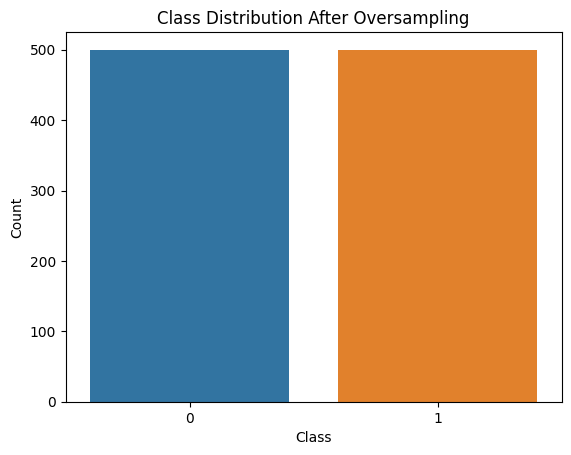

In [93]:
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame if needed
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='Outcome')

# Example: Print the class distribution before and after SMOTE
# print("Before SMOTE:")
# print(y.value_counts())

# print("\nAfter SMOTE:")
# print(y_resampled.value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [94]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X_resampled)
XSCDF2= pd.DataFrame(X_scaled2,columns=X.columns)

In [95]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(XSCDF2, y_resampled, test_size=0.2, random_state=42)

# **Checking if Data is linear or non linear**

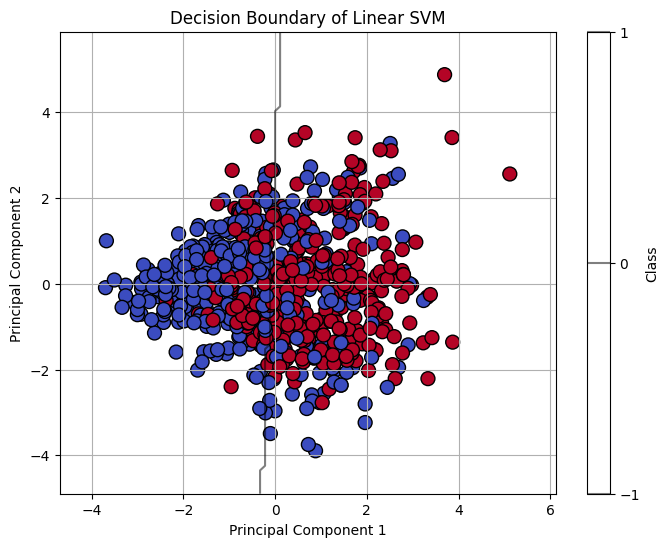

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train_resampled)


def plot_decision_boundary(model, X, y):

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)


    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary of Linear SVM')
    plt.grid(True)
    plt.colorbar(label='Class')


plt.figure(figsize=(8, 6))
plot_decision_boundary(svm_model, X_train_pca, y_train_resampled)
plt.show()

#it suggest that data is non linear


In [97]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
print('Training Accuracy of KNN : ', knn.score(X_train_resampled,y_train_resampled))
print('Testing Accuracy of KNN : ', knn.score(X_test_resampled,y_test_resampled))

Training Accuracy of KNN :  0.85
Testing Accuracy of KNN :  0.73


In [98]:
lgr = LogisticRegression(max_iter=1000)  # You can adjust parameters like max_iter if needed
lgr.fit(X_train_resampled, y_train_resampled)

print('Training Accuracy of Logistic Regression : ', lgr.score(X_train_resampled,y_train_resampled))
print('Testing Accuracy of Logistic Regression : ', lgr.score(X_test_resampled,y_test_resampled))

Training Accuracy of Logistic Regression :  0.745
Testing Accuracy of Logistic Regression :  0.775


In [99]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)

print('Training Accuracy of DT : ', dt.score(X_train_resampled,y_train_resampled))
print('Testing Accuracy of DT : ', dt.score(X_test_resampled,y_test_resampled))

Training Accuracy of DT :  1.0
Testing Accuracy of DT :  0.725


In [100]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test_resampled, y_test_resampled), verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5142 - loss: 0.7195 - val_accuracy: 0.7100 - val_loss: 0.6183
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.6124 - val_accuracy: 0.7100 - val_loss: 0.5657
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5650 - val_accuracy: 0.7050 - val_loss: 0.5311
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.5238 - val_accuracy: 0.7450 - val_loss: 0.5143
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.5300 - val_accuracy: 0.7550 - val_loss: 0.5078
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.5256 - val_accuracy: 0.7600 - val_loss: 0.5009
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.5331 - val_accuracy: 0.7650 - val_loss: 0.4969
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7678 - loss: 0.4879 - val_accuracy: 0.7700 - val_loss

In [101]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

lgb_model = lgb.LGBMClassifier()

# Fit the model
lgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_train_pred = lgb_model.predict(X_train_resampled)
y_test_pred = lgb_model.predict(X_test_resampled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

# Print accuracies
print('Training Accuracy of LightGBM: ', train_accuracy)
print('Testing Accuracy of LightGBM: ', test_accuracy)

[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# **Hyperparameter Tuning**

In [102]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [103]:
best_model = grid_search.fit(X_train_resampled, y_train_resampled)

In [104]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 18


In [105]:
#Predict testing set
knn_pred = best_model.predict(X_test_resampled)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.63      0.72        99
           1       0.71      0.88      0.78       101

    accuracy                           0.76       200
   macro avg       0.77      0.75      0.75       200
weighted avg       0.77      0.76      0.75       200


 F1:
 0.7841409691629956

 Precision score is:
 0.7063492063492064

 Recall score is:
 0.8811881188118812

 Confusion Matrix:



<Axes: >

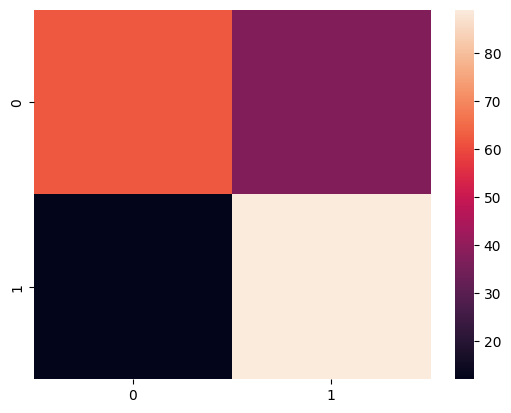

In [106]:
print("Classification Report is:\n",classification_report(y_test_resampled,knn_pred))
print("\n F1:\n",f1_score(y_test_resampled,knn_pred))
print("\n Precision score is:\n",precision_score(y_test_resampled,knn_pred))
print("\n Recall score is:\n",recall_score(y_test_resampled,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test_resampled,knn_pred))

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [108]:
best_model= nbModel_grid.fit(X_train_resampled, y_train_resampled)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [109]:
nb_pred=best_model.predict(X_test_resampled)

Classification Report is:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71        99
           1       0.72      0.71      0.72       101

    accuracy                           0.71       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.72      0.71      0.72       200


 F1:
 0.7164179104477613

 Precision score is:
 0.72

 Recall score is:
 0.7128712871287128

 Confusion Matrix:



<Axes: >

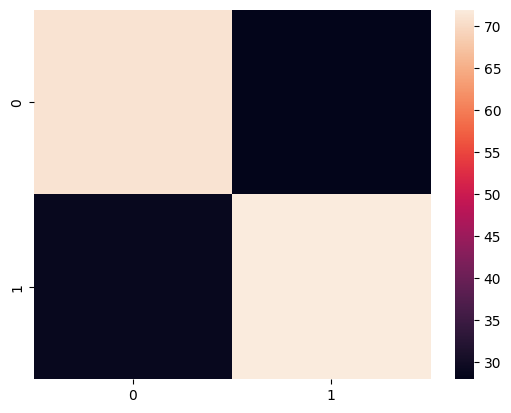

In [110]:
print("Classification Report is:\n",classification_report(y_test_resampled,nb_pred))
print("\n F1:\n",f1_score(y_test_resampled,nb_pred))
print("\n Precision score is:\n",precision_score(y_test_resampled,nb_pred))
print("\n Recall score is:\n",recall_score(y_test_resampled,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test_resampled,nb_pred))

In [111]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [112]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [113]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [114]:
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)
svm_pred=grid_result.predict(X_test_resampled)

In [115]:
#Best Hyperparameters Value
print('best kernel:', grid_result.best_estimator_.get_params()['kernel'])
print('Best c:', grid_result.best_estimator_.get_params()['C'])
print('Best gamma:', grid_result.best_estimator_.get_params()['gamma'])

best kernel: rbf
Best c: 1.0
Best gamma: scale


Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78        99
           1       0.76      0.89      0.82       101

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200


 F1:
 0.7841409691629956

 Precision score is:
 0.7063492063492064

 Recall score is:
 0.8811881188118812

 Confusion Matrix:



<Axes: >

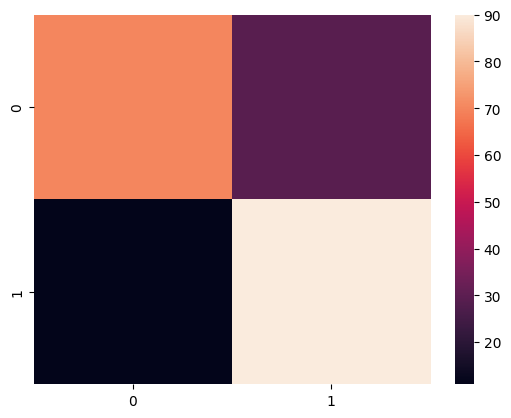

In [116]:
print("Classification Report is:\n",classification_report(y_test_resampled,svm_pred))
print("\n F1:\n",f1_score(y_test_resampled,knn_pred))
print("\n Precision score is:\n",precision_score(y_test_resampled,knn_pred))
print("\n Recall score is:\n",recall_score(y_test_resampled,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test_resampled,svm_pred))

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [118]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [119]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [120]:
best_model=grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [121]:
dt_pred=best_model.predict(X_test_resampled)

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79        99
           1       0.77      0.88      0.82       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200


 F1:
 0.8240740740740742

 Precision score is:
 0.7739130434782608

 Recall score is:
 0.8811881188118812

 Confusion Matrix:



<Axes: >

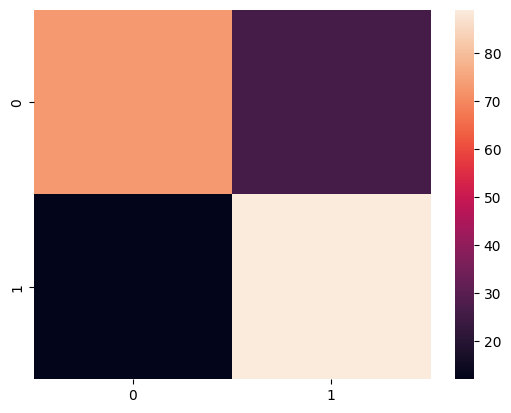

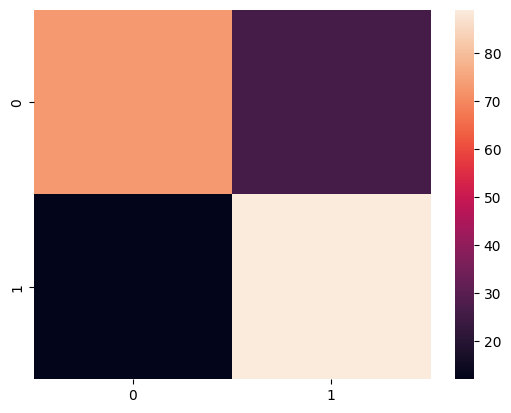

In [122]:
print("Classification Report is:\n",classification_report(y_test_resampled,dt_pred))
print("\n F1:\n",f1_score(y_test_resampled,dt_pred))
print("\n Precision score is:\n",precision_score(y_test_resampled,dt_pred))
print("\n Recall score is:\n",recall_score(y_test_resampled,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test_resampled,dt_pred))

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [129]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [130]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [131]:
best_model = grid_search.fit(X_train_resampled, y_train_resampled)

In [132]:
rf_pred=best_model.predict(X_test_resampled)

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80        99
           1       0.77      0.90      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200


 F1:
 0.7841409691629956

 Precision score is:
 0.7063492063492064

 Recall score is:
 0.8811881188118812

 Confusion Matrix:



<Axes: >

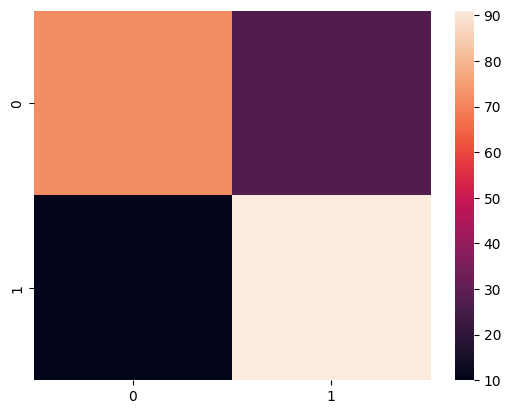

In [133]:
print("Classification Report is:\n",classification_report(y_test_resampled,rf_pred))
print("\n F1:\n",f1_score(y_test_resampled,knn_pred))
print("\n Precision score is:\n",precision_score(y_test_resampled,knn_pred))
print("\n Recall score is:\n",recall_score(y_test_resampled,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test_resampled,rf_pred))